In [1]:
# Sales Prediction with Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#virgülden sonra 2 basamak göster ayarı

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [5]:
# Simple Linear Regression with OLS Using Scikit-Learn

In [7]:
df = pd.read_csv("OneDrive/Masaüstü/advertising.csv")
df.shape

(200, 4)

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90


In [9]:
X = df[["TV"]]
X

,TV
0,230.10
1,44.50
2,17.20
3,151.50
4,180.80
...,...
195,38.20
196,94.20
197,177.00
198,283.60


In [11]:
y = df[["sales"]]
y

,sales
0,22.10
1,10.40
2,9.30
3,18.50
4,12.90
...,...
195,7.60
196,9.70
197,12.80
198,25.50


In [12]:
# Model

In [13]:
reg_model = LinearRegression().fit(X, y)

#yukarıda import ettiğimiz LinearRegression metodu

In [17]:
# y_hat = b + w*X

#X dediğimiz şey = TV

#o zaman formül : y_hat = b + w*TV

In [18]:
# sabit (b - bias)
reg_model.intercept_[0]

#bias = sabit = b = intercept

#[0] demeden çağırınca array olarak getirir o yüzden böyle yapıyoruz

7.032593549127693

In [19]:
# tv'nin katsayısı (w1)
reg_model.coef_[0][0]

#teta = w = coefficient = coef = katsayı

# iki tane [0] demeden çağırınca array olarak getirir o yüzden böyle yapıyoruz

0.047536640433019764

In [20]:
# Tahmin

In [21]:
# 150 birimlik TV harcaması olsa ne kadar satış olması beklenir?

In [22]:
reg_model.intercept_[0] + reg_model.coef_[0][0]*150

14.163089614080658

In [23]:
# 500 birimlik tv harcaması olsa ne kadar satış olur?

reg_model.intercept_[0] + reg_model.coef_[0][0]*500

30.800913765637574

In [25]:
df.describe().T

#normalde tv max değeri 296 ama biz 500ü sorabildik

,count,mean,std,min,25%,50%,75%,max
TV,200.00,147.04,85.85,0.70,74.38,149.75,218.82,296.40
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


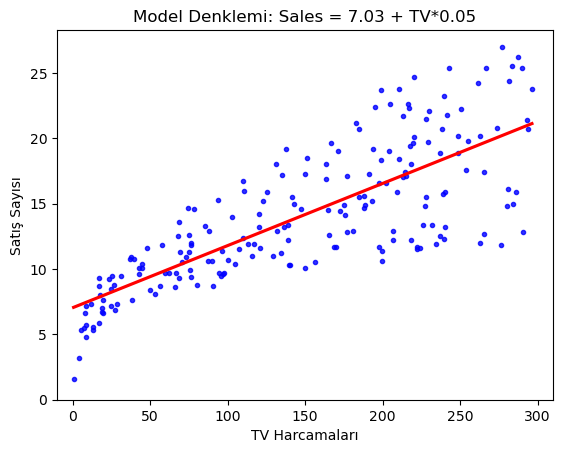

In [26]:
# Modelin Görselleştirilmesi
g = sns.regplot(x=X, y=y, scatter_kws={'color': 'b', 's': 9},
                ci=False, color="r")

g.set_title(f"Model Denklemi: Sales = {round(reg_model.intercept_[0], 2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10, 310)
plt.ylim(bottom=0)
plt.show()

In [27]:
#yukarıda gerçek değerler maviler
#kırmızı çizgi = model = tahmin = tahmin edilen değer = tahmin fonksiyonu

In [29]:
# Tahmin Başarısı

In [30]:
# MSE
y_pred = reg_model.predict(X)
mean_squared_error(y, y_pred)

#y = gerçek değerler , y_pred = tahmin edilen değerler
#sonuç = ortalama hata
# 10.51

10.512652915656757

In [31]:
#istediğimiz şey bu sonuçtaki 10un minimum olması

In [32]:
y.mean()

sales   14.02
dtype: float64

In [33]:
y.std()

sales   5.22
dtype: float64

In [35]:
#yani değerler 19 ve 9 arasında değişiyor gibi görünüyor
#yani bizim 10 değeri biraz büyük gibi

In [37]:
# RMSE
np.sqrt(mean_squared_error(y, y_pred))
# 3.24

3.2423221486546887

In [38]:
# MAE
mean_absolute_error(y, y_pred)
# 2.54

2.549806038927486

In [40]:
#bu üçü arasında kıyas yapılmamalı hangisi iyidir değildir gibi
#herkes kendi arasında kıyaslanmalı

In [41]:
# R-KARE
reg_model.score(X, y)

0.611875050850071

In [42]:
# Multiple Linear Regression

In [43]:
df = pd.read_csv("OneDrive/Masaüstü/advertising.csv")

In [44]:
df

,TV,radio,newspaper,sales
0,230.10,37.80,69.20,22.10
1,44.50,39.30,45.10,10.40
2,17.20,45.90,69.30,9.30
3,151.50,41.30,58.50,18.50
4,180.80,10.80,58.40,12.90
...,...,...,...,...
195,38.20,3.70,13.80,7.60
196,94.20,4.90,8.10,9.70
197,177.00,9.30,6.40,12.80
198,283.60,42.00,66.20,25.50


In [46]:
X = df.drop('sales', axis=1)
X

#sales dışındakiler 
#bağımsız değişkenler

,TV,radio,newspaper
0,230.10,37.80,69.20
1,44.50,39.30,45.10
2,17.20,45.90,69.30
3,151.50,41.30,58.50
4,180.80,10.80,58.40
...,...,...,...
195,38.20,3.70,13.80
196,94.20,4.90,8.10
197,177.00,9.30,6.40
198,283.60,42.00,66.20


In [48]:
y = df[["sales"]]
y

#bağımlı değişken

,sales
0,22.10
1,10.40
2,9.30
3,18.50
4,12.90
...,...
195,7.60
196,9.70
197,12.80
198,25.50


In [49]:
# Model

In [50]:
#önceki bölümde basit regresyon üzerinden basitçe ilerledik şimdi diğer kavramları da ele alalım

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

#test %20 oldu train ise %80
#hocayla aynı sonucu alalım diye random_state=1

In [53]:
y_test.shape

(40, 1)

In [54]:
y_train.shape

(160, 1)

In [55]:
X_test.shape

(40, 3)

In [56]:
X_train.shape

(160, 3)

In [57]:
#veri seti test %20 oldu train ise %80 olacak şekilde bölündü (yukarıda görebiliyoruz)

In [58]:
reg_model = LinearRegression().fit(X_train, y_train)

In [59]:
# sabit (b - bias)
reg_model.intercept_

array([2.90794702])

In [60]:
# coefficients (w - weights)
reg_model.coef_

array([[0.0468431 , 0.17854434, 0.00258619]])

In [61]:
# Aşağıdaki gözlem değerlerine göre satışın beklenen değeri nedir?

# TV: 30
# radio: 10
# newspaper: 40

# 2.90 = sabit
# 0.0468431 , 0.17854434, 0.00258619 = katsayılar

In [68]:
#Sales = 2.90  + (TV * 0.04 + radio * 0.17 + newspaper * 0.002)

In [69]:
2.90794702 + 30 * 0.0468431 + 10 * 0.17854434 + 40 * 0.00258619

6.20213102

In [71]:
#fonksiyonel şekilde yapalım

yeni_veri = [[30], [10], [40]]
yeni_veri = pd.DataFrame(yeni_veri).T

#yeni veriyi dataframe'e çevirdik

yeni_veri

,0,1,2
0,30,10,40


In [72]:
reg_model.predict(yeni_veri)

#tahmin et dedik

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.202131]])

In [73]:
# Tahmin Başarısını Değerlendirme

In [74]:
#modeli train seti üzerine kurduk 
#bunun hatasını değerlendirmek istersek:

In [79]:
# Train RMSE
y_pred = reg_model.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred))
# 1.73

#önceden %30lardaydı değişken ekledikten sonra hata düştü

1.736902590147092

In [80]:
# TRAIN RKARE
reg_model.score(X_train, y_train)

#bağımsız değişkenin bağımlı değişkeni etkileme/açıklama oranı

#daha önce %60lardaydı ve değişken ekleyince %90 oldu demek ki önceden underfit etmişiz

#yani yeni değişken eklendiğinde hata düşer başarı artar

0.8959372632325174

In [81]:
# Test RMSE
y_pred = reg_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))
# 1.41

1.411341755858158

In [83]:
#normalde test hatası train hatasından daha yüksek çıkar ama burada daha düşük çıkmış
#beklenti dışı ve iyi bi durum

In [86]:
# Test RKARE
reg_model.score(X_test, y_test)

#bağımsız değişkenin bağımlı değişkeni etkileme/açıklama oranı 
#trainde de böyle çıkmıştı

0.8927605914615385

In [87]:
# 10 Katlı CV (cross validation = çağraz doğrulama) RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=10,
                                 scoring="neg_mean_squared_error")))

# 1.69

1.6913531708051797

In [90]:
# 5 Katlı CV RMSE
np.mean(np.sqrt(-cross_val_score(reg_model,
                                 X,
                                 y,
                                 cv=5,
                                 scoring="neg_mean_squared_error")))
# 1.71

1.717524727873208

In [91]:
# Simple Linear Regression with Gradient Descent from Scratch

In [92]:
#bu kısım bonus. aslında uygulama bitti. kod seviyesinde bu işlemleri merak edenler için......

In [93]:
# Cost function MSE

def cost_function(Y, b, w, X):
    m = len(Y)  #gözlem sayısı
    sse = 0     #hata kareler toplamı

    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        sse += (y_hat - y) ** 2  #toplam hata

    mse = sse / m    #ortalama hata
    return mse

#bu fonksiyonun amacı mse hesaplamak

In [94]:
# update_weights

def update_weights(Y, b, w, X, learning_rate):  #learning_rate = öğrenme oranı/hızı
    m = len(Y)
    b_deriv_sum = 0  #bu ikisi hesaplamamız gereken
    w_deriv_sum = 0  #türevler
    for i in range(0, m):
        y_hat = b + w * X[i]
        y = Y[i]
        b_deriv_sum += (y_hat - y)   #sabit için türevler toplanmış
        w_deriv_sum += (y_hat - y) * X[i]    #ağırlık için türevler toplanmış
    new_b = b - (learning_rate * 1 / m * b_deriv_sum)
    new_w = w - (learning_rate * 1 / m * w_deriv_sum)
    return new_b, new_w

In [95]:
# train fonksiyonu
def train(Y, initial_b, initial_w, X, learning_rate, num_iters):   #num_iters = iterasyon sayısı

    print("Starting gradient descent at b = {0}, w = {1}, mse = {2}".format(initial_b, initial_w,
                                                                   cost_function(Y, initial_b, initial_w, X)))  #ilk hata

    b = initial_b
    w = initial_w
    
    cost_history = []

    for i in range(num_iters):
        b, w = update_weights(Y, b, w, X, learning_rate)
        mse = cost_function(Y, b, w, X)
        cost_history.append(mse)


        if i % 100 == 0:
            print("iter={:d}    b={:.2f}    w={:.4f}    mse={:.4}".format(i, b, w, mse))


    print("After {0} iterations b = {1}, w = {2}, mse = {3}".format(num_iters, b, w, cost_function(Y, b, w, X)))
    return cost_history, b, w

In [96]:
X = df["radio"]
Y = df["sales"]

# hyperparameters
learning_rate = 0.001
initial_b = 0.001
initial_w = 0.001
num_iters = 100000

In [ ]:
#cost_history, b, w = train(Y, initial_b, initial_w, X, learning_rate, num_iters)

#yoruma aldım çünkü 100000 kere çalışacaktı